In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lib.score.tils import TILVisual, TILScore
from lib.biomarker.utils import get_area, batch_convert_to_dat

In [2]:
tils_dir = "data/output/concave_dist[65]_sample[10]_buffer[50]"
wsi_dir = "data/wsi"
clsinfo_dir = f"{tils_dir}/features"
cluster_dir = f"{tils_dir}/visual"

wsi_id = "test_wsi"


In [3]:
tils = TILScore(wsi_id=wsi_id, slide_dir=wsi_dir, clsinfo_dir=clsinfo_dir, cluster_dir=cluster_dir)
tils_score = tils.get_tils_all()
morphology_features = tils.get_tumour_m_features()
print(tils_score)
print(morphology_features)

reading clusters
{'mean_ntil_ntum': 0.04385991297753763, 'mean_ntil_acls': 1.984803690135132e-05, 'mean_ntil_atum': 8.196504252348856e-05, 'mean_atil_atum': 0.02747183534744067, 'mean_inner_ntil_ntum': 0.007455122803246771, 'mean_outer_ntil_ntum': 0.19918327829557791, 'mean_inner_atil_atum': 0.004077622587713328, 'mean_outer_atil_atum': 0.11540119180255325, 'mean_inner_ntil_acls': 5.329866732127225e-06, 'mean_outer_ntil_acls': 3.299894914085926e-05, 'mean_inner_ntil_atum': 1.4878628343669708e-05, 'mean_outer_ntil_atum': 0.0003510706049752958, 'std_ntil_ntum': 1.984803690135132e-05, 'std_ntil_acls': 8.196504252348856e-05, 'std_ntil_atum': 0.02747183534744067, 'std_atil_atum': 0.007455122803246771, 'std_inner_ntil_ntum': 0.19918327829557791, 'std_outer_ntil_ntum': 0.004077622587713328, 'std_inner_atil_atum': 0.11540119180255325, 'std_outer_atil_atum': 5.329866732127225e-06, 'std_inner_ntil_acls': 3.299894914085926e-05, 'std_outer_ntil_acls': 1.4878628343669708e-05, 'std_inner_ntil_atum':

We need to convert HoverNet prediction to another format. Use `batch_convert_to_dat()` function to convert all HoverNet prediction in `nuclei_hovernet_dir` to `nuclei_dat_dir`

In [4]:
nuclei_hovernet_dir = "data/nuclei/json/"
nuclei_dat_dir = "data/nuclei/dat/"
batch_convert_to_dat(nuclei_hovernet_dir, nuclei_dat_dir)

  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
wsiobj = TILVisual(
    wsi_id=wsi_id,
    slide_dir=wsi_dir,
    clsinfo_dir=clsinfo_dir,
    cluster_dir=cluster_dir,
    slide_level=1, 
    nuclei_dir=nuclei_dat_dir
    )

area_info = {
    "cls":[],
    "area":[]
}
for c_id in wsiobj.cluster_ids:
    temp = wsiobj.get_downsampled_coords(int(c_id),0)
    area = get_area(temp[0])
    area_info["cls"].append(c_id)
    area_info["area"].append(area)
area_info["cls"] = np.array(area_info["cls"])
area_info["area"] = np.array(area_info["area"])
area_info["sort_index"] = np.argsort(area_info["area"])[::-1]
print("Largest to smallest cluster ID:", area_info["cls"][area_info["sort_index"]])

reading clusters
reading nuclei annotation
Largest to smallest cluster ID: ['36' '16' '127' '136' '110' '88' '120' '109' '83' '14' '84' '154' '123'
 '54' '40' '107' '12' '75' '115' '8' '86' '37' '139' '67' '108' '82' '101'
 '113' '11' '47' '55' '48' '26' '114' '49' '9' '57' '53' '146' '135' '129'
 '132' '43' '105' '152' '46' '0' '78' '126' '99' '141' '39' '76' '104'
 '140' '65' '7' '1' '35' '91' '74' '94' '70' '92' '151' '66' '29' '142'
 '28' '134' '100' '63' '90' '119' '161' '149' '77' '133' '42' '130' '81'
 '20' '30' '6' '72' '73' '138' '61' '15' '56' '5' '80' '34' '31' '93' '98'
 '23' '51' '60' '32' '112' '24' '121' '19' '33' '18' '44' '116' '118'
 '165' '58' '69' '85' '2' '160' '4' '163' '168' '166' '159' '68' '150'
 '117' '148' '125' '25' '128' '157' '147' '156' '158' '124' '52' '59'
 '167' '106' '13' '95' '62' '41' '21' '144' '122' '145' '50' '155' '96'
 '22' '79' '3' '102' '143' '71' '45' '87' '162' '164' '38' '27' '111' '89'
 '103' '131' '97' '137' '64' '10' '17' '153']


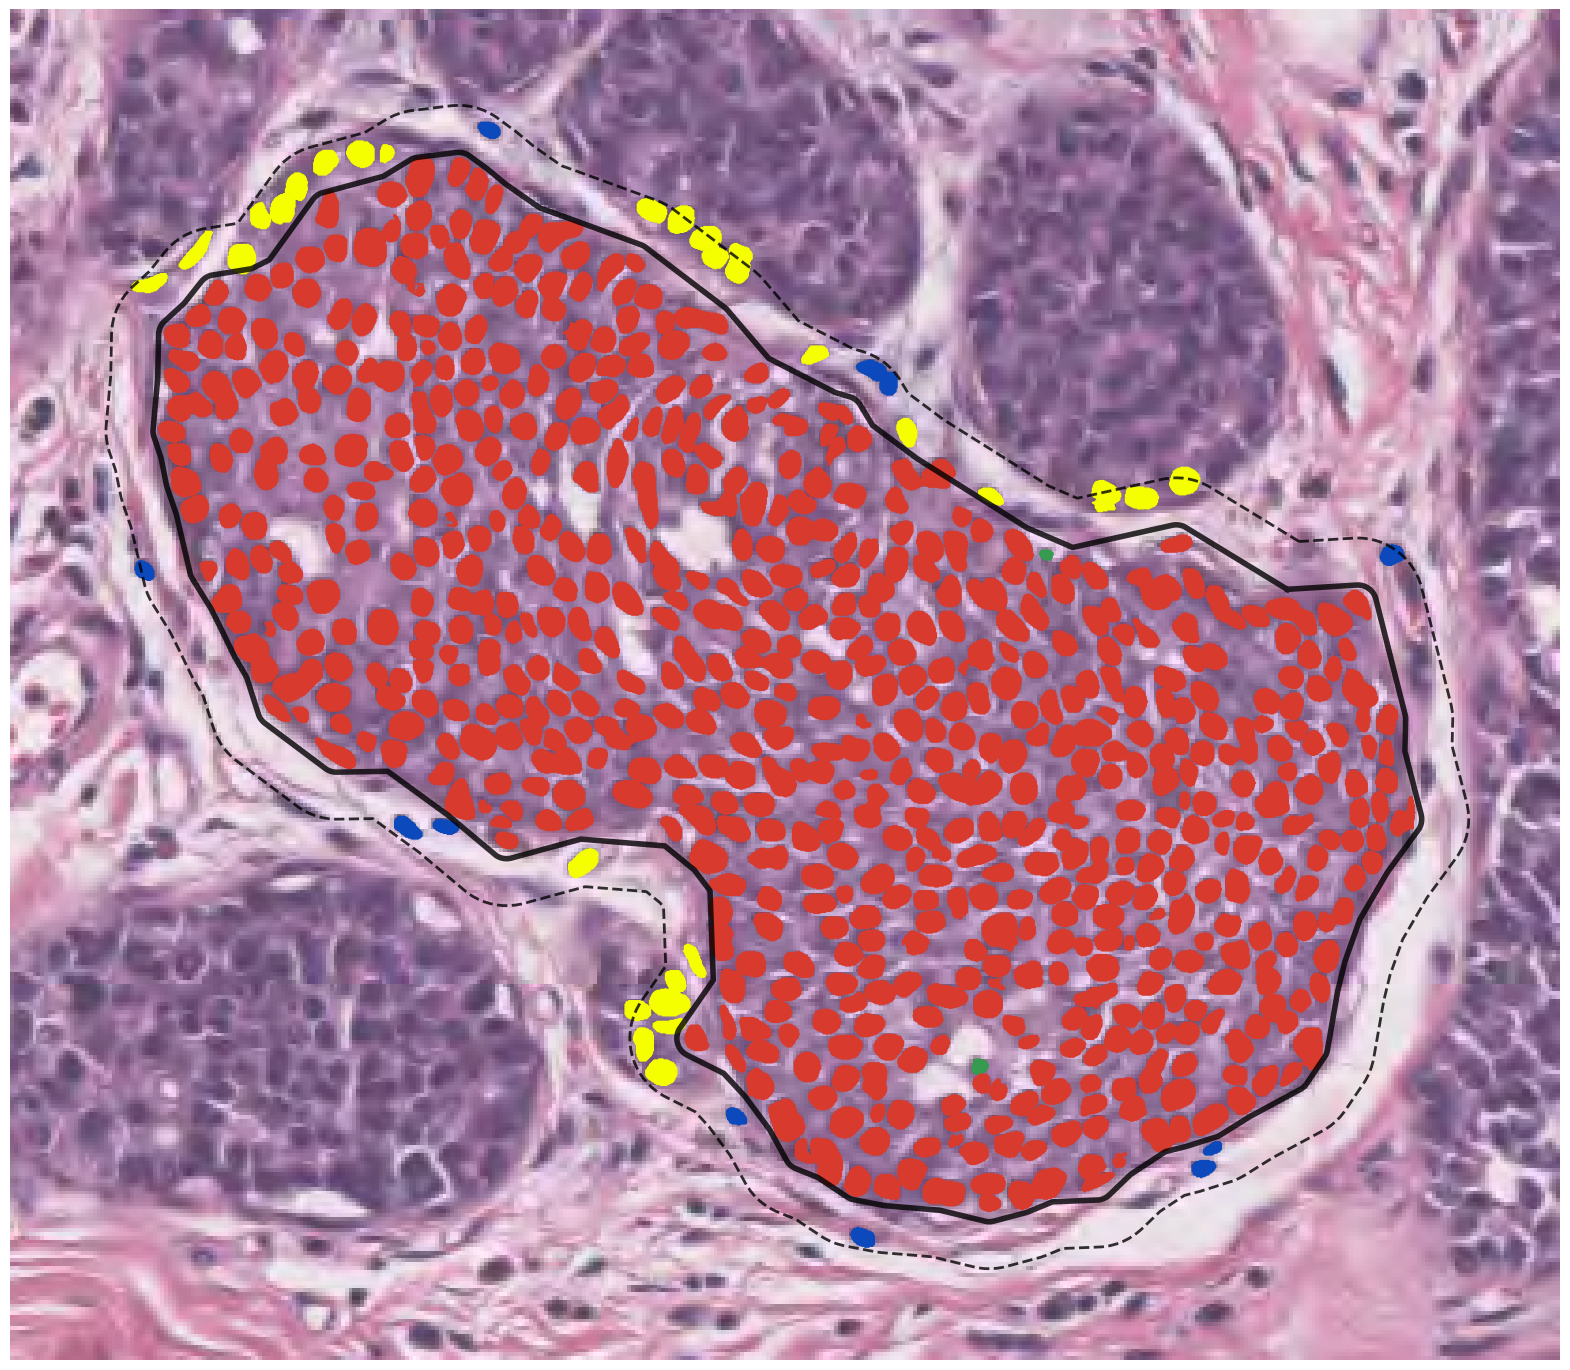

In [6]:
cluster_id = int(area_info["cls"][area_info["sort_index"]][0])
plot_size = 2000
px = 1/plt.rcParams['figure.dpi']
params = {
    "figsize":(plot_size*px,plot_size*px),
}
to_plots = {
    "nuclei":False,
    "tissue":True,

    "inner_clusters":True,
    "outer_clusters":True,

    "inner_tils":True,
    "outer_tils":True,
    "inner_tums":True,
    "outer_tums":True,

    "cluster_fill":False,
}
alpha = {
    "type1":0.8,
    "type2":1
}
save_path = "figures"
prefix_name = "tils"


wsiobj.plot(
    cluster_id=cluster_id,
    centered_by=100,
    alpha=alpha,
    params=params,
    save_path="figures",
    save=False,
    fig_name=f"{prefix_name}_{wsi_id}_{cluster_id}",
    to_plots=to_plots,
    save_as="png"
    )